# Linear regression on test data set for Econ 400.

In [46]:
import pandas as pd
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots

In [47]:
students = (1,2,3,4,5)
GPA = (2.8,3.4,3.1,3.5,3.7)
ACT = (22,27,26,25,30)
d = {'students': [1,2,3,4,5],
    'GPA': [2.8,3.4,3.1,3.5,3.7],
    'ACT': [27,32,31,30,35]}
df = pd.DataFrame(data = d)
df

,students,GPA,ACT
0,1,2.8,27
1,2,3.4,32
2,3,3.1,31
3,4,3.5,30
4,5,3.7,35


1.1

In [54]:
def linear_regression_descriptive(table, x, y):
    xval = table[x]
    yval= table[y]
    
    def correlation(table, x, y):
        def standard_units(z):
            """Converts an array x to standard units"""
            return (z - np.mean(z)) / np.std(z)
        x_su = standard_units(x)
        y_su = standard_units(y)
        return np.mean(x_su * y_su)
    correlation = correlation(table, xval, yval)
    
    def slope_econ(table, x_column, y_column):
        xi = table[x_column]
        yi = table[y_column]
        xbar = np.average(xi)
        ybar = np.average(yi)
        return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
    slope = slope_econ(table, x, y)
    
    def intercept(table, x_column, y_column):
        xi = table[x_column]
        yi = table[y_column]
        xbar = np.average(xi)
        ybar = np.average(yi)
        def slope_econ(table, x_column, y_column):
            return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
        slope = slope_econ(table, x_column, y_column)
        intercept = np.average(yi-slope*xbar)
        return intercept
    intercept = intercept(table,x,y)
    
    predicted = intercept + slope*xval
    residuals = yval - predicted
    MRSE = np.sqrt(np.mean(residuals**2))
    
    predicted_table1 = table.copy()
    predicted_table1['predicted'] = predicted
    predicted_table = predicted_table1.copy()
    predicted_table['residuals'] = residuals
    
    #Prints the estimated regression line.
    print('Predicted y Value =', slope, 'x', '+', intercept)
    print('r =', correlation)
    print('Sum of residuals =', np.sum(predicted_table['residuals']))
    print('MRSE =', MRSE)
    
    #Shows the predicted data as a line and scatters the actual points.
    plots.plot(table[x], predicted_table['predicted'])
    plots.scatter(predicted_table[x], predicted_table[y]);
    plots.title('Best Fit Line for Compared Data')
    plots.xlabel(x)
    plots.ylabel(y)
    plots.show();
    #Create a scatter plot that shows the residuals around the best fit line.
    #This is to visually look to see if there is a clustered pattern.
    #This is also to visually check to see how clustered the residuals are around the best fit.
    xlims = make_array(min(xval), max(xval))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4); 
    plots.scatter(predicted_table[x], predicted_table['residuals']);
    plots.title('Residual Plot of Compared Data')
    plots.xlabel(x)
    plots.ylabel('residuals')
    plots.show();
    
    return predicted_table

Predicted y Value = 1.4 x + 26.8
r = 0.7592566023652966
Sum of residuals = 3.552713678800501e-15
MRSE = 1.6970562748477136


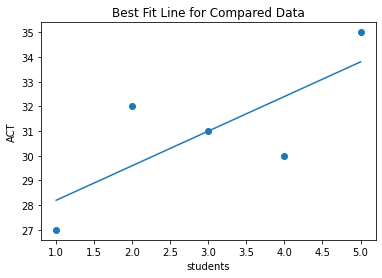

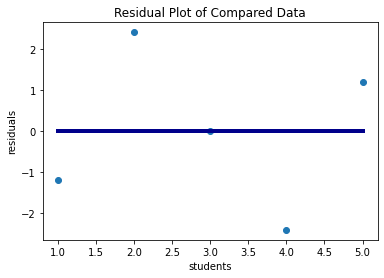

,students,GPA,ACT,predicted,residuals
0,1,2.8,27,28.2,-1.2
1,2,3.4,32,29.6,2.4
2,3,3.1,31,31.0,0.0
3,4,3.5,30,32.4,-2.4
4,5,3.7,35,33.8,1.2


In [55]:
linear_regression_descriptive(df, 'students', 'ACT')